In [50]:
#-*- coding: utf-8 -*-
import re
from wxpy import *
import jieba
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from scipy.misc import imread
from wordcloud import WordCloud, ImageColorGenerator

def write_txt_file(path, txt):
    '''
    写入txt文本
    '''
    with open(path, 'a', encoding='gb18030', newline='') as f:
        f.write(txt)

def read_txt_file(path):
    '''
    读取txt文本
    '''
    with open(path, 'r', encoding='gb18030', newline='') as f:
        return f.read()

def login():
    # 初始化机器人，扫码登陆
    bot = Bot()

    # 获取所有好友
    my_friends = bot.friends()

    print(type(my_friends))
    return my_friends

def show_sex_ratio(friends):
    # 使用一个字典统计好友男性和女性的数量
    sex_dict = {'male': 0, 'female': 0}

    for friend in friends:
        # 统计性别
        if friend.sex == 1:
            sex_dict['male'] += 1
        elif friend.sex == 2:
            sex_dict['female'] += 1

    print(sex_dict)

def get_area_distribution(friends):
    # 使用一个字典统计各省好友数量
    province_dict = {'北京': 0, '上海': 0, '天津': 0, '重庆': 0,
        '河北': 0, '山西': 0, '吉林': 0, '辽宁': 0, '黑龙江': 0,
        '陕西': 0, '甘肃': 0, '青海': 0, '山东': 0, '福建': 0,
        '浙江': 0, '台湾': 0, '河南': 0, '湖北': 0, '湖南': 0,
        '江西': 0, '江苏': 0, '安徽': 0, '广东': 0, '海南': 0,
        '四川': 0, '贵州': 0, '云南': 0,
        '内蒙古': 0, '新疆': 0, '宁夏': 0, '广西': 0, '西藏': 0,
        '香港': 0, '澳门': 0, '台湾': 0}

    # 统计省份
    for friend in friends:
        if friend.province in province_dict.keys():
            province_dict[friend.province] += 1

    # 为了方便数据的呈现，生成JSON Array格式数据
    data = []
    for key, value in province_dict.items():
        data.append({'name': key, 'value': value})

    return data

    
def show_area_distribution(friends):
    # 使用一个字典统计各省好友数量
    province_dict = {'北京': 0, '上海': 0, '天津': 0, '重庆': 0,
        '河北': 0, '山西': 0, '吉林': 0, '辽宁': 0, '黑龙江': 0,
        '陕西': 0, '甘肃': 0, '青海': 0, '山东': 0, '福建': 0,
        '浙江': 0, '台湾': 0, '河南': 0, '湖北': 0, '湖南': 0,
        '江西': 0, '江苏': 0, '安徽': 0, '广东': 0, '海南': 0,
        '四川': 0, '贵州': 0, '云南': 0,
        '内蒙古': 0, '新疆': 0, '宁夏': 0, '广西': 0, '西藏': 0,
        '香港': 0, '澳门': 0, '台湾': 0}

    # 统计省份
    for friend in friends:
        if friend.province in province_dict.keys():
            province_dict[friend.province] += 1

    # 为了方便数据的呈现，生成JSON Array格式数据
    data = []
    for key, value in province_dict.items():
        data.append({'name': key, 'value': value})

    print(data)

def show_signature(friends):
    # 统计签名
    for friend in friends:
        # 对数据进行清洗，将标点符号等对词频统计造成影响的因素剔除
        pattern = re.compile(r'[一-龥]+')
        filterdata = re.findall(pattern, friend.signature)
        write_txt_file('signatures.txt', ''.join(filterdata))

    # 读取文件
    content = read_txt_file('signatures.txt')
    segment = jieba.lcut(content)
    words_df = pd.DataFrame({'segment':segment})

    # 读取stopwords
    stopwords = pd.read_csv("stopwords.txt",index_col=False,quoting=3,sep=" ",names=['stopword'],encoding='utf-8')
    words_df = words_df[~words_df.segment.isin(stopwords.stopword)]
#     print(words_df)

    words_stat = words_df.groupby(by=['segment'])['segment'].agg({"计数":numpy.size})
    words_stat = words_stat.reset_index().sort_values(by=["计数"],ascending=False)

    # 设置词云属性
    color_mask = imread('background.jfif')
    wordcloud = WordCloud(font_path="simhei.ttf",   # 设置字体可以显示中文
                    background_color="white",       # 背景颜色
                    max_words=100,                  # 词云显示的最大词数
                    mask=color_mask,                # 设置背景图片
                    max_font_size=80,              # 字体最大值
                    random_state=42,
                    width=1200, height=1060, margin=2,# 设置图片默认的大小,但是如果使用背景图片的话,                                                   # 那么保存的图片大小将会按照其大小保存,margin为词语边缘距离
                    )

    # 生成词云, 可以用generate输入全部文本,也可以我们计算好词频后使用generate_from_frequencies函数
    word_frequence = {x[0]:x[1]for x in words_stat.head(100).values}
#     print(word_frequence)
    word_frequence_dict = {}
    for key in word_frequence:
        word_frequence_dict[key] = word_frequence[key]

    wordcloud.generate_from_frequencies(word_frequence_dict)
    # 从背景图片生成颜色值  
    image_colors = ImageColorGenerator(color_mask) 
    # 重新上色
    wordcloud.recolor(color_func=image_colors)
    # 保存图片
    wordcloud.to_file('weixin_most_words.png')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()



In [2]:
if __name__ == '__main__':
    friends = login()
    show_sex_ratio(friends)

Getting uuid of QR code.
Please scan the QR code to log in.
Please press confirm on your phone.
Loading the contact, this may take a little while.
Login successfully as 荒岛书生


<class 'wxpy.api.chats.chats.Chats'>
{'male': 191, 'female': 142}


In [40]:
    show_area_distribution(friends)

[{'name': '河南', 'value': 1}, {'name': '广西', 'value': 1}, {'name': '北京', 'value': 19}, {'name': '山东', 'value': 3}, {'name': '山西', 'value': 1}, {'name': '重庆', 'value': 2}, {'name': '辽宁', 'value': 1}, {'name': '云南', 'value': 0}, {'name': '河北', 'value': 0}, {'name': '湖北', 'value': 1}, {'name': '福建', 'value': 10}, {'name': '江西', 'value': 0}, {'name': '天津', 'value': 1}, {'name': '澳门', 'value': 0}, {'name': '湖南', 'value': 0}, {'name': '上海', 'value': 21}, {'name': '广东', 'value': 17}, {'name': '宁夏', 'value': 0}, {'name': '四川', 'value': 4}, {'name': '黑龙江', 'value': 1}, {'name': '安徽', 'value': 1}, {'name': '西藏', 'value': 0}, {'name': '青海', 'value': 0}, {'name': '新疆', 'value': 0}, {'name': '海南', 'value': 0}, {'name': '贵州', 'value': 0}, {'name': '台湾', 'value': 23}, {'name': '吉林', 'value': 2}, {'name': '浙江', 'value': 14}, {'name': '内蒙古', 'value': 0}, {'name': '香港', 'value': 2}, {'name': '甘肃', 'value': 0}, {'name': '江苏', 'value': 120}, {'name': '陕西', 'value': 3}]


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:113: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:117: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


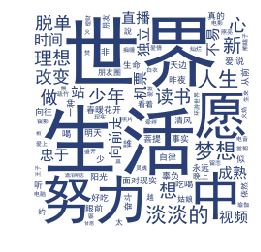

In [51]:
    show_signature(friends)

In [57]:
from pyecharts import Bar, Line
from pyecharts.engine import create_default_environment

myfriends_pro = get_area_distribution(friends)
# 按照好友数量排序
newlist = sorted(myfriends_pro, key=lambda k: k['value'], reverse = True) 

pro_list,num_list = [], []
for onefriend in newlist:
    if onefriend["value"] > 0:
        pro_list.append(onefriend["name"])
        num_list.append(onefriend["value"])
bar = Bar("好友数量", "共有" + str(len(friends)) + "个好友。他们分布在" + str(len(num_list)) + "个省份" , width=1200, height=600)

print(len(pro_list), len(num_list))
bar.add("我的微信好友分布", pro_list, num_list, is_stack=True)
bar.render(r"./我的微信好友分布.html")
bar

21 21


In [58]:
from pyecharts import Map

value = num_list 
attr = pro_list 
map=Map('我的好友分布',width=1000,height=800)
map.add("", attr, value, maptype='china', visual_range=[0, 10], visual_text_color="#fff",  
        symbol_size=10, is_visualmap=True)  
map.render(r"./我的微信好友分布地图.html")
map